In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/vincefav/RNN-Humor/master/humor_dataset.csv')

data.head()

,word,mean,sd,n,mean_M,sd_M,n_M,mean_F,sd_F,n_F,mean_young,sd_young,n_young,mean_old,sd_old,n_old
0,abbey,2.293,1.146,41,2.176,1.380,17,2.348,0.982,23,2.391,1.196,23,2.167,1.098,18
1,abode,2.414,1.119,29,2.100,0.994,10,2.579,1.170,19,2.692,1.182,13,2.188,1.047,16
2,abscess,1.594,1.043,32,1.625,1.188,8,1.583,1.018,24,1.556,1.042,18,1.643,1.082,14
3,absence,1.640,0.952,25,1.615,0.961,13,1.667,0.985,12,1.571,0.852,14,1.727,1.104,11
4,abstract,2.412,1.282,34,1.933,1.033,15,2.789,1.357,19,2.421,1.121,19,2.400,1.502,15


In [0]:
words = list(data['word'])
words = [i.lower() for i in words]

In [4]:
chars = set(sorted(" ".join(words)))
print('total chars:', len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

total chars: 27


In [0]:
words = [list(i) for i in words]
for word in words:
  for ix, letter in enumerate(word):
    word[ix] = char_indices[word[ix]]

In [6]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM

Using TensorFlow backend.


In [7]:
maxlen = 25

print('Pad sequences (samples x time)')
x = sequence.pad_sequences(words, maxlen=maxlen)
print('x shape:', x.shape)

Pad sequences (samples x time)
x shape: (4997, 25)


In [0]:
y = data['mean']

In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.2)

In [10]:
print('Build model...')
model = Sequential()
model.add(Embedding(27, 128))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1))

# try using different optimizers and different optimizer configs
model.compile(loss='mean_squared_error',
              optimizer='rmsprop',
              metrics=['mse'])

print('Train...')
model.fit(xtrain, ytrain,
          batch_size=16,
          epochs=5,
          validation_data=(xtest, ytest))

Build model...
Train...
Train on 3997 samples, validate on 1000 samples
Epoch 1/5
3997/3997 [==============================] - 41s 10ms/step - loss: 0.2792 - mean_squared_error: 0.2792 - val_loss: 0.2046 - val_mean_squared_error: 0.2046
Epoch 2/5
2560/3997 [==================>...........] - ETA: 13s - loss: 0.1802 - mean_squared_error: 0.1802

3997/3997 [==============================] - 40s 10ms/step - loss: 0.1820 - mean_squared_error: 0.1820 - val_loss: 0.2062 - val_mean_squared_error: 0.2062
Epoch 3/5
3997/3997 [==============================] - 39s 10ms/step - loss: 0.1785 - mean_squared_error: 0.1785 - val_loss: 0.2019 - val_mean_squared_error: 0.2019
Epoch 4/5
 960/3997 [======>.......................] - ETA: 28s - loss: 0.1849 - mean_squared_error: 0.1849

3997/3997 [==============================] - 40s 10ms/step - loss: 0.1753 - mean_squared_error: 0.1753 - val_loss: 0.2038 - val_mean_squared_error: 0.2038
Epoch 5/5
3997/3997 [==============================] - 40s 10ms/step - loss: 0.1730 - mean_squared_error: 0.1730 - val_loss: 0.2108 - val_mean_squared_error: 0.2108


In [0]:
def predict(word):
  word = [char_indices[i] for i in word]
  word = sequence.pad_sequences([word], maxlen=maxlen)

  return model.predict(word)[0][0]

In [12]:
predict('doggo')

2.608596

In [13]:
predict('doggy')

2.7184813

In [14]:
predict('flimflam')

2.3478727

In [15]:
predict('bookworm')

2.4892282

In [21]:
from random import choice

preds = []

for i in range(1005):
  w = choice(list(data['word'].str.lower()))
  p = predict(w)
  preds.append(p)
  if p > 2.77:
    print(f'*** {w} is funny! ({p})')
  elif p < 2.14:
    print(f'{w} is not very funny. ({p})')
  
preds = pd.Series(preds)

earnest is not very funny. (2.1274287700653076)
terrain is not very funny. (2.1324429512023926)
*** grizzly is funny! (2.7722322940826416)
*** ducky is funny! (2.7989766597747803)
*** bubbly is funny! (2.8620352745056152)
*** ducky is funny! (2.7989766597747803)
*** dummy is funny! (2.78082537651062)
*** bubbly is funny! (2.8620352745056152)
*** fuzz is funny! (2.958644151687622)
savant is not very funny. (2.135618209838867)
extent is not very funny. (2.1261260509490967)


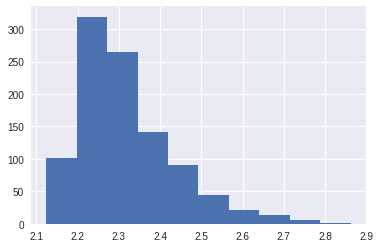

In [20]:
preds.hist()